# Credit Card Fraud Detection
#### *This notebook performs exploratory data analysis (EDA) on the credit card transactions dataset. The goal is to understand the structure of the data, check for class imbalance, and identify any patterns that may help in detecting fraudulent transactions.*

In [1]:
# Optional code block 
# to check/change the working directory on my PC

import os 
# Confirm current working directory
print(os.getcwd())
# to change the working directory on my PC
os.chdir("C:/Users/oyeor/Documents/GitHub/credit-card-fraud-detection")

C:\Users\oyeor\Desktop\JUPYTYER


#### *Import Libraries*

In [2]:
# Install library(ies) or Import module(s)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.0. Load Dataset

In [3]:
## Load the CSV file
df = pd.read_csv("C:/Users/oyeor/Documents/GitHub/credit-card-fraud-detection/data/raw/creditcard.csv")

# Preview
display(df.shape, df.head())  

(284807, 31)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
## Basic info Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# check missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
## data types summary
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

###### *Most columns are floats — all set for analysis.*

## 2.0. Exploratory Data Analysis

In [7]:
# Summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


###### *Amount: Are there extreme values?*

###### *Time: Range of seconds (will explore later)*

#### :- Class 
#### Understand the target Variable

In [8]:
df["Class"].value_counts(normalize = True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

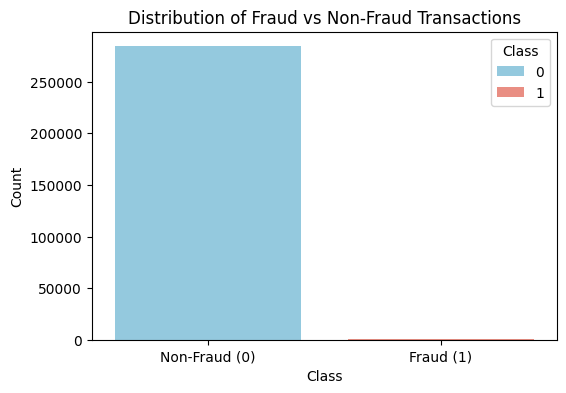

Fraud cases make up 0.1727% of the dataset.


In [9]:
## Class Distribution (Fraud Vs. Non-Fraud)
# This is to examine how imbalanced the dataset is.

# count fraud vs non-fraud
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x = "Class", hue = "Class", palette={0: 'skyblue', 1: 'salmon'})
plt.title("Distribution of Fraud vs Non-Fraud Transactions")
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel("Count")
plt.show()


# Percentage of fraud cases
fraud_pct = df["Class"].mean() * 100
print(f"Fraud cases make up {fraud_pct:.4f}% of the dataset.")

###### This helps us understand class imbalance, a major issue in fraud detection. Since only 0.17% of transactions are frauds, we need to Avoid accuracy as the main metric and Consider resampling techniques later.

#### :- Amount 
#### Transaction Amount Distribution

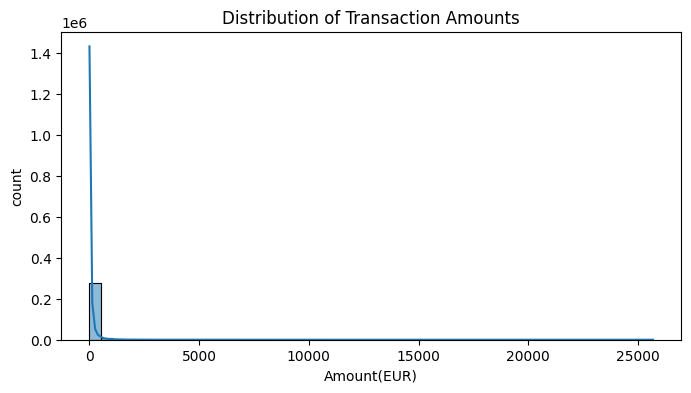

In [10]:
plt.figure(figsize = (8,4))
sns.histplot( df["Amount"], bins = 50, kde = True)
plt.xlabel("Amount(EUR)")
plt.ylabel("count")
plt.title("Distribution of Transaction Amounts")
plt.show()

###### *Most transactions are small in value (clustered near zero). A very small number of transactions have large amounts, which causes the long tail(right skewed). We’ll likely need to scale or transform this feature later.*
###### *This type of distribution is common in financial datasets and will benefit from log transformation later for modeling*
###### *A few large transactions (outliers) exist — potentially fraudulent?*

#### :- Time vs Fraud Activity
###### This helps us check temporal patterns. Time is in seconds from the first transaction.

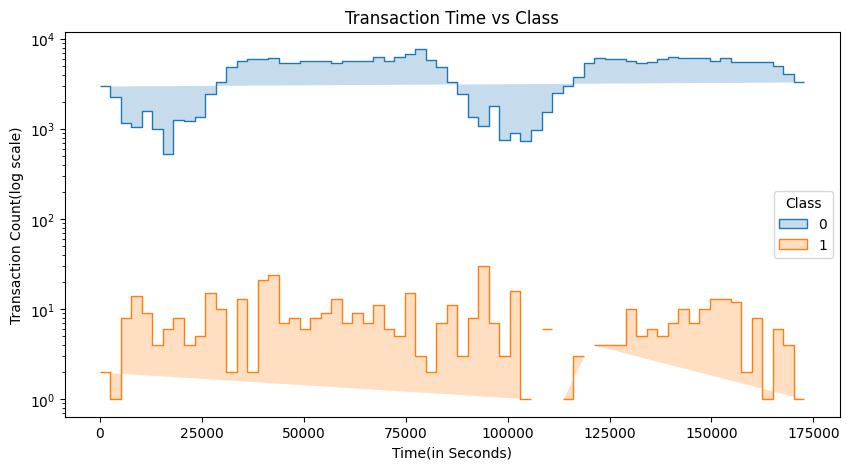

In [11]:
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = "Time", hue = "Class", log_scale = (False, True), element = "step")
plt.xlabel("Time(in Seconds)")
plt.ylabel("Transaction Count(log scale)")
plt.title("Transaction Time vs Class")
plt.show()

#### :- Boxplot of Amount by Class

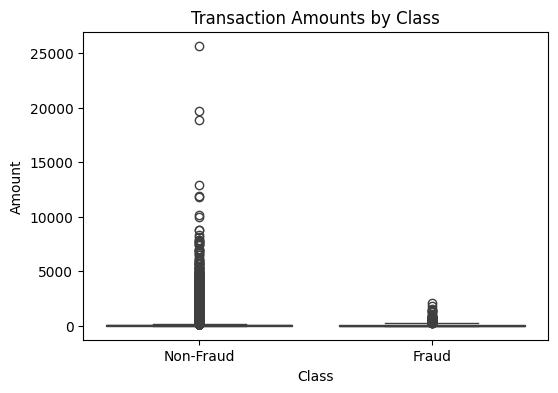

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amounts by Class")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


#### :- Correlation Heatmap (V1–V28)
###### *This is useful to identify if any variable including anonymized features are strongly correlated with the target.*

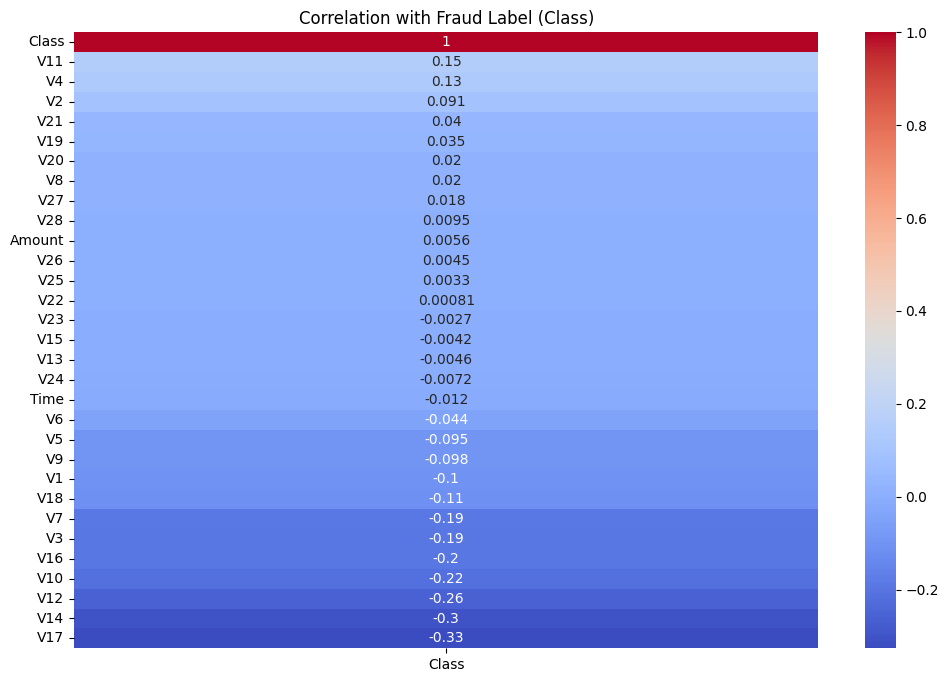

In [13]:
corr = df.corr()

plt.figure(figsize = (12,8))
sns.heatmap(corr[["Class"]].sort_values(by = "Class", ascending = False), annot = True, cmap = "coolwarm")
plt.title("Correlation with Fraud Label (Class)")
plt.show()

### Key Correlation Insights

**Most predictive features:**
- `V11`, `V4`, and `V2` show the **strongest positive correlation** with fraud (values increase in fraud cases).
- `V17`, `V14`, `V12`, and `V10` have **strong negative correlation** (values tend to decrease in fraud).

**Low or no correlation:**
- Features like `Amount`, `Time`, `V28`, and `V27` show **very weak or no linear relationship** with fraud.

**Magnitude matters:**
- Features with correlation above **±0.2** (e.g., `V11`, `V17`, `V14`) are potentially more informative for distinguishing fraud vs. non-fraud.


## 3.0. Preprocessing and Modelling

#### *3.1. Preprocessing*

In [14]:
# Separate features and target variable(s)

x = df.drop(columns = ["Class"])
y = df["Class"]

In [15]:
# Feature Scaling (Standardization)
# We do this because Logistic Regression is sensitive to feature magnitudes

from sklearn.preprocessing import StandardScaler  # import module

scaler = StandardScaler()   # scaler instance

x_scaled = scaler.fit_transform(x) #  Apply scaling to all features

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled,y,
    test_size = 0.3,
    stratify = y,  # It preserves the same "Class" proportions in both training and test sets
    random_state = 42
)

#### *3.2. Modelling*
##### *3.2.1. Logistic Regression*

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the model
model = LogisticRegression(max_iter = 1000, random_state = 42)

# Fit on training data
model.fit(x_train, y_train)

# Predict on test data
y_predict = model.predict(x_test)

# Print evaluation metrics
print("Confussion Matrix: ")
print(confusion_matrix(y_test, y_predict))

print("\nClassification Report: ")
print(classification_report(y_test, y_predict))

print("\nROC-AUC score: ", roc_auc_score(y_test, y_predict))


# Recall on the fraud class (Class = 1) tells us how many frauds we correctly detected
# Precision tells how many of our fraud predictions were correct

Confussion Matrix: 
[[85279    16]
 [   59    89]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.60      0.70       148

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443


ROC-AUC score:  0.8005818835424908


###### *The model caught 89 real frauds (good!), but Missed 59 frauds which is common with Logistic Regression and class imbalance. Only 16 false alarms on non-fraud customers (great precision).*
###### *Recall on the fraud class (Class = 1) tells us how many frauds we correctly detected*
###### *Precision tells how many of our fraud predictions were correct*

##### **Handling Class Imbalance.**
###### *Apply SMOTE (Synthetic Minority Oversampling Technique).*

###### *We do this because the model is strong on precision (85%) but only recalls 60% of frauds.*

###### *Since fraud is rare, we want to reduce the number of missed frauds (false negatives). To do this, we’ll use a technique called SMOTE.*

In [18]:
# install the library

%pip install -q imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state = 42)

# Apply only on training set
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# check new class distribution
print("Before Smote: ", y_train.value_counts())
print("After Smote: ", y_train_resampled.value_counts())

# The SMOTE generates new synthetic examples of the minority class (fraud) only in the training set
# This balances the classes and gives the model more examples to learn from

Before Smote:  Class
0    199020
1       344
Name: count, dtype: int64
After Smote:  Class
0    199020
1    199020
Name: count, dtype: int64


In [20]:
# Re-initialize logistic regression
model_resampled = LogisticRegression(max_iter = 1000, random_state = 42)

# Train on resampled traning data
model_resampled.fit(x_train_resampled, y_train_resampled)

# Predict on original test set (same test data as before)
y_predict_resampled = model_resampled.predict(x_test)

# Evaluate
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix (After SMOTE):")
print(confusion_matrix(y_test, y_predict_resampled))

print("\n classification Report(After SMOTE):")
print(classification_report(y_test, y_predict_resampled))

print("\n ROC-AUC Score (After SMOTE):", roc_auc_score(y_test, y_predict_resampled))


Confusion Matrix (After SMOTE):
[[83403  1892]
 [   18   130]]

 classification Report(After SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443


 ROC-AUC Score (After SMOTE): 0.9280982694400832


###### Summary Results:

###### The model after SMOTE has significantly improved recall, catching 88% of fraud cases which is crucial in real-world fraud detection.

###### However, precision has dropped i.e the model now raises more false alarms (predicts fraud when it’s not), but this is often acceptable in fraud detection where missing a fraud is riskier than flagging a false one.

###### ROC-AUC is very strong at 0.93, meaning the model separates fraud and non-fraud transactions quite well overall.

##### *3.2.2. Random Forest/XGBoost*

In [21]:
# We’ll train the model on the SMOTE-balanced training set and test on the original test set.

from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators = 100, random_state=42)

# Train on balanced data
rf_model.fit(x_train_resampled, y_train_resampled)

# Predict on test data
y_predict_rf = rf_model.predict(x_test)

# Evalute
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix(Random Forest):")
print(confusion_matrix(y_test, y_predict_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_predict_rf, y_test))

print("ROC-AUC Score(Random Forest):", roc_auc_score(y_test, y_predict_rf))

Confusion Matrix(Random Forest):
[[85281    14]
 [   32   116]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85313
           1       0.78      0.89      0.83       130

    accuracy                           1.00     85443
   macro avg       0.89      0.95      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score(Random Forest): 0.8918098237753552


###### Random Forest achieved high recall and precision for fraud detection, reducing false negatives significantly.

###### **ROC Curve and Precision-Recall(PR) Curve**

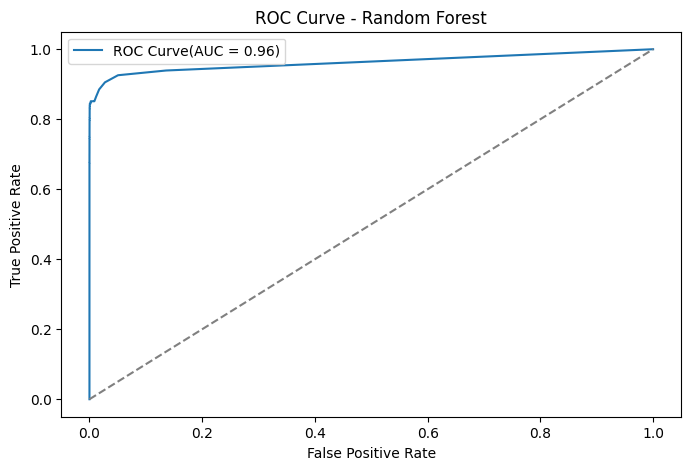

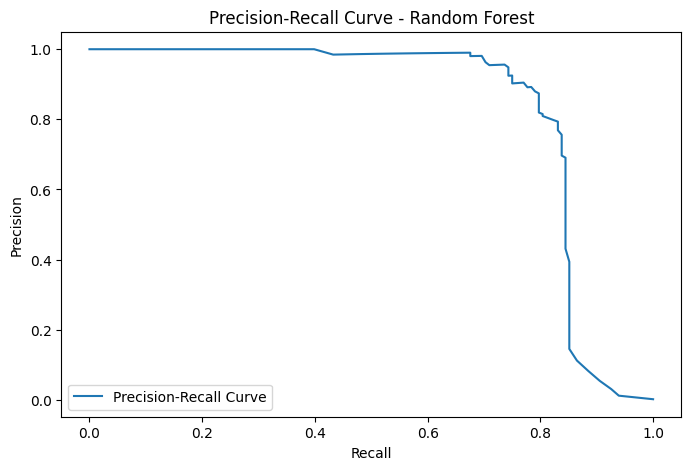

In [23]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_scores = rf_model.predict_proba(x_test)[:, 1]  # Probabilities for class 1

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)    # fpr(false positive rate), tpr(true positive rate)
roc_auc = auc(fpr, tpr)     # Calculates the Area Under the Curve (AUC) for the ROC curve.

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, label = f"ROC Curve(AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle = '--', color = 'gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize = (8, 5))
plt.plot(recall, precision, label = "Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend()
plt.show()


##### *3.2.3. Threshold Tuning*

In [26]:
from sklearn.metrics import precision_recall_curve, f1_score

# Get predicted probabilities
y_probs = rf_model.predict_proba(x_test)[:, 1]

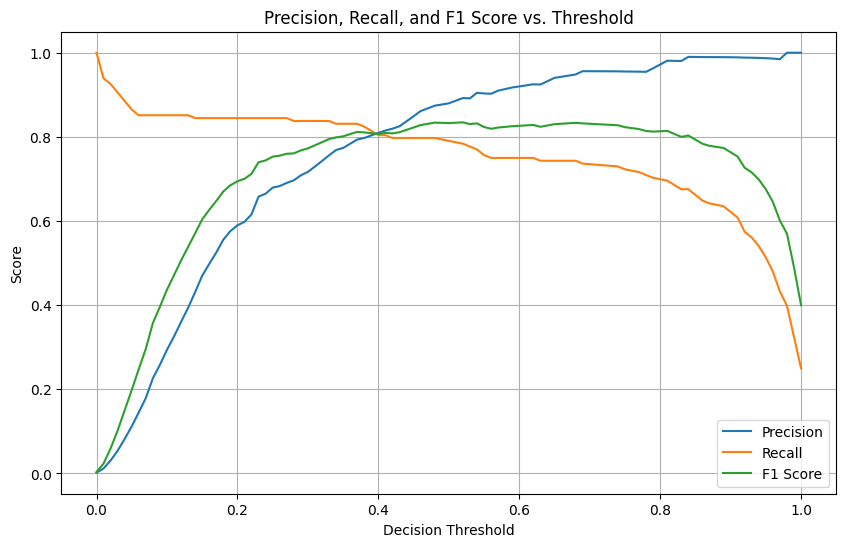

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Avoid divide by zero

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# We can optionally extract the best threshold by F1 score

best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold (by F1):", best_threshold)

Best Threshold (by F1): 0.52


In [29]:
# Re-evaluate Model with New Threshold

# Convert probabilities to class predictions using new threshold
y_pred_custom = (y_probs >= best_threshold).astype(int)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_custom))


Confusion Matrix:
 [[85281    14]
 [   32   116]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8918098237753552


###### Threshold tuning balanced the model better than default settings or SMOTE alone.
###### It achieved excellent precision and high recall, showing the model is both accurate and sensitive to fraud.


##### *4.0. Save the Trained Model*

In [31]:
# We'll use joblib, which is efficient for models with large NumPy arrays (like Random Forests)

%pip install joblib -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import joblib

# Save model
joblib.dump(rf_model, 'random_forest_fraud_model.pkl')


['random_forest_fraud_model.pkl']

In [ ]:
## To Load the Model Later

## Load model
#rf_model_loaded = joblib.load('random_forest_fraud_model.pkl')

## Use it like before
#rf_model_loaded.predict(X_test)